In [72]:
#사용 기상청 데이터 : 1974-2023년까지의 서울 종관관측데이터
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [73]:
folder_path = 'data'
file_list = os.listdir(folder_path)
csv_files = [file for file in file_list if file.endswith('.csv')]

In [74]:
# CSV 파일들을 읽어서 DataFrame으로 병합
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding = 'euckr')
    df_list.append(df)
    
# DataFrame 병합
merged_df = pd.concat(df_list, ignore_index=True)


In [128]:
merged_df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
0,108,서울,2014-01-01,4.0,0.3,723.0,7.9,1535.0,0.03,NaN,...,0.0,14.8,270.0,1304.0,7.8,270.0,1256.0,3.7,3218.0,270.0
1,108,서울,2014-01-02,1.5,-1.3,724.0,6.2,1507.0,NaN,NaN,...,NaN,6.0,270.0,1327.0,4.0,230.0,1124.0,2.0,1685.0,290.0
2,108,서울,2014-01-03,2.3,-1.1,635.0,7.3,1338.0,NaN,NaN,...,NaN,7.8,320.0,2053.0,5.4,320.0,2136.0,2.5,2148.0,50.0
3,108,서울,2014-01-04,-0.1,-3.7,722.0,5.6,1344.0,NaN,NaN,...,NaN,7.6,270.0,1748.0,4.7,290.0,1749.0,2.4,2087.0,270.0
4,108,서울,2014-01-05,-0.8,-4.3,810.0,3.8,1418.0,NaN,NaN,...,NaN,6.9,250.0,1521.0,4.4,290.0,1543.0,1.9,1660.0,270.0


In [76]:
merged_df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)'],
      dtype='object')

In [77]:
#날짜순으로 데이터 정렬
merged_df_sorted = merged_df.sort_values(by = '일시')
merged_df_sorted

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
14610,108,서울,1974-01-01,1.0,-4.3,410.0,7.6,1423.0,1.42,NaN,...,0.0,7.0,230.0,1504.0,5.0,230.0,1540.0,2.1,1824.0,70.0
14611,108,서울,1974-01-02,3.0,-1.1,550.0,9.3,1352.0,NaN,NaN,...,NaN,4.7,250.0,1437.0,3.3,250.0,1600.0,1.6,1394.0,50.0
14612,108,서울,1974-01-03,3.0,-0.9,755.0,8.7,1520.0,NaN,NaN,...,NaN,5.5,70.0,945.0,3.0,70.0,1100.0,1.3,1127.0,70.0
14613,108,서울,1974-01-04,1.3,-1.6,600.0,5.6,1505.0,NaN,NaN,...,NaN,6.0,290.0,1552.0,4.0,290.0,1650.0,1.9,1646.0,290.0
14614,108,서울,1974-01-05,-1.1,-3.7,740.0,2.1,1542.0,NaN,NaN,...,NaN,3.8,70.0,907.0,3.0,320.0,50.0,1.0,839.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,108,서울,2023-12-27,1.5,-2.8,813.0,6.8,1549.0,NaN,NaN,...,NaN,4.7,110.0,1235.0,3.0,50.0,1237.0,1.4,1203.0,50.0
3648,108,서울,2023-12-28,1.2,-1.7,620.0,4.4,1453.0,NaN,NaN,...,NaN,8.0,290.0,1456.0,4.7,290.0,1350.0,1.6,1342.0,270.0
3649,108,서울,2023-12-29,1.3,-1.5,725.0,4.6,1438.0,NaN,NaN,...,NaN,5.7,250.0,1448.0,3.3,270.0,1455.0,1.7,1481.0,20.0
3650,108,서울,2023-12-30,0.6,-0.9,237.0,2.1,2354.0,16.67,NaN,...,13.1,6.9,50.0,2013.0,4.6,50.0,1739.0,2.6,2276.0,50.0


In [78]:
# 그래프 그리기
# 일시 컬럼을 Datetime 형식으로 변환
merged_df_sorted['일시'] = pd.to_datetime(merged_df_sorted['일시'])

In [79]:
# 일시를 인덱스로 설정
merged_df_sorted.set_index('일시', drop=False, inplace=True)

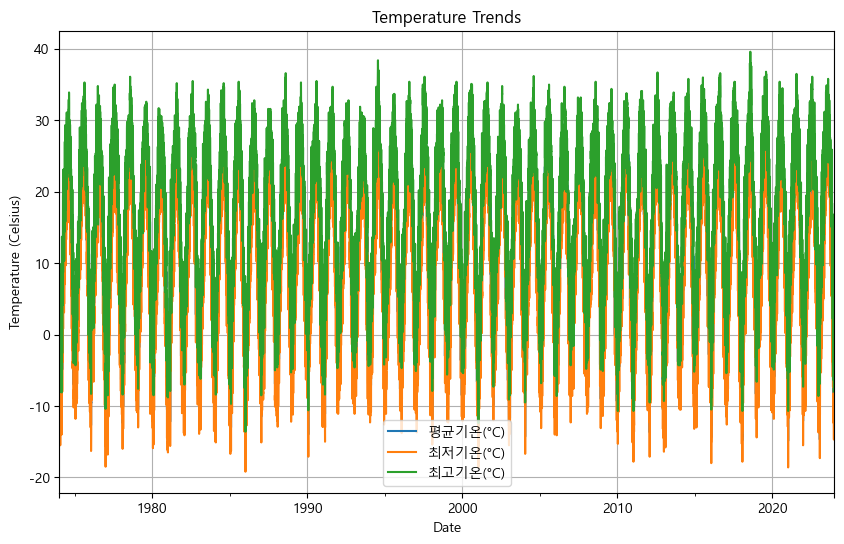

In [80]:
merged_df_sorted.plot(y=['평균기온(°C)', '최저기온(°C)', '최고기온(°C)'], figsize=(10, 6))
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

In [90]:
#연도별 6~9월의 기온 추이 뽑기
#'일시' 컬럼의 월 텍스트가 7, 8월인 텍스트 뽑기
merged_df_sorted_v2 = merged_df_sorted[(merged_df_sorted['일시'].dt.strftime('%m').isin(['06', '07', '08','09']))]
merged_df_sorted_v2

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위)
일시,,,,,,,,,,,,,,,,,,,,,
1974-06-01,108,서울,1974-06-01,15.3,11.8,246.0,20.1,1457.0,4.78,0.6,...,2.7,24.6,250.0,58.0,13.7,250.0,110.0,6.5,5604.0,250.0
1974-06-02,108,서울,1974-06-02,17.5,12.6,600.0,24.1,1228.0,8.15,1.0,...,12.2,12.5,110.0,2318.0,7.0,110.0,2320.0,2.8,2462.0,250.0
1974-06-03,108,서울,1974-06-03,16.0,13.8,2400.0,20.3,1200.0,2.13,2.4,...,12.3,8.3,250.0,1401.0,6.0,250.0,1720.0,2.6,2222.0,250.0
1974-06-04,108,서울,1974-06-04,15.0,10.9,2400.0,20.5,1605.0,NaN,NaN,...,NaN,9.2,50.0,2202.0,5.0,50.0,2200.0,2.8,2380.0,70.0
1974-06-05,108,서울,1974-06-05,15.4,9.7,455.0,21.7,1530.0,NaN,NaN,...,NaN,7.8,70.0,712.0,4.3,70.0,710.0,2.7,2324.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,108,서울,2023-09-26,19.9,18.6,510.0,20.8,1355.0,24.00,1.8,...,27.8,5.7,90.0,46.0,3.5,90.0,51.0,2.4,2054.0,50.0
2023-09-27,108,서울,2023-09-27,21.5,20.0,632.0,23.7,1433.0,11.75,0.4,...,4.4,5.6,250.0,1905.0,3.1,250.0,1902.0,1.8,1548.0,50.0
2023-09-28,108,서울,2023-09-28,22.7,19.6,634.0,27.3,1422.0,NaN,NaN,...,NaN,7.2,290.0,1405.0,3.7,250.0,1600.0,2.0,1724.0,270.0


In [105]:
#연도별, 월별 최고기온 추이 뽑아내기
df_max_temp = merged_df_sorted_v2[['일시', '최고기온(°C)']]
df_max_temp.head()

,일시,최고기온(°C)
일시,,
1974-06-01,1974-06-01,20.1
1974-06-02,1974-06-02,24.1
1974-06-03,1974-06-03,20.3
1974-06-04,1974-06-04,20.5
1974-06-05,1974-06-05,21.7


In [107]:
#연도, 월 컬럼 추가
df_max_temp['연도'] = df_max_temp['일시'].dt.year
df_max_temp['월'] = df_max_temp['일시'].dt.month
df_max_temp.head()

C:\Users\user\AppData\Local\Temp\ipykernel_22572\2404312150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_temp['연도'] = df_max_temp['일시'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_22572\2404312150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_temp['월'] = df_max_temp['일시'].dt.month


,일시,최고기온(°C),연도,월
일시,,,,
1974-06-01,1974-06-01,20.1,1974,6
1974-06-02,1974-06-02,24.1,1974,6
1974-06-03,1974-06-03,20.3,1974,6
1974-06-04,1974-06-04,20.5,1974,6
1974-06-05,1974-06-05,21.7,1974,6


In [122]:
result = df_max_temp.groupby(['연도', '월'])['최고기온(°C)'].mean()
result_df = result.reset_index()

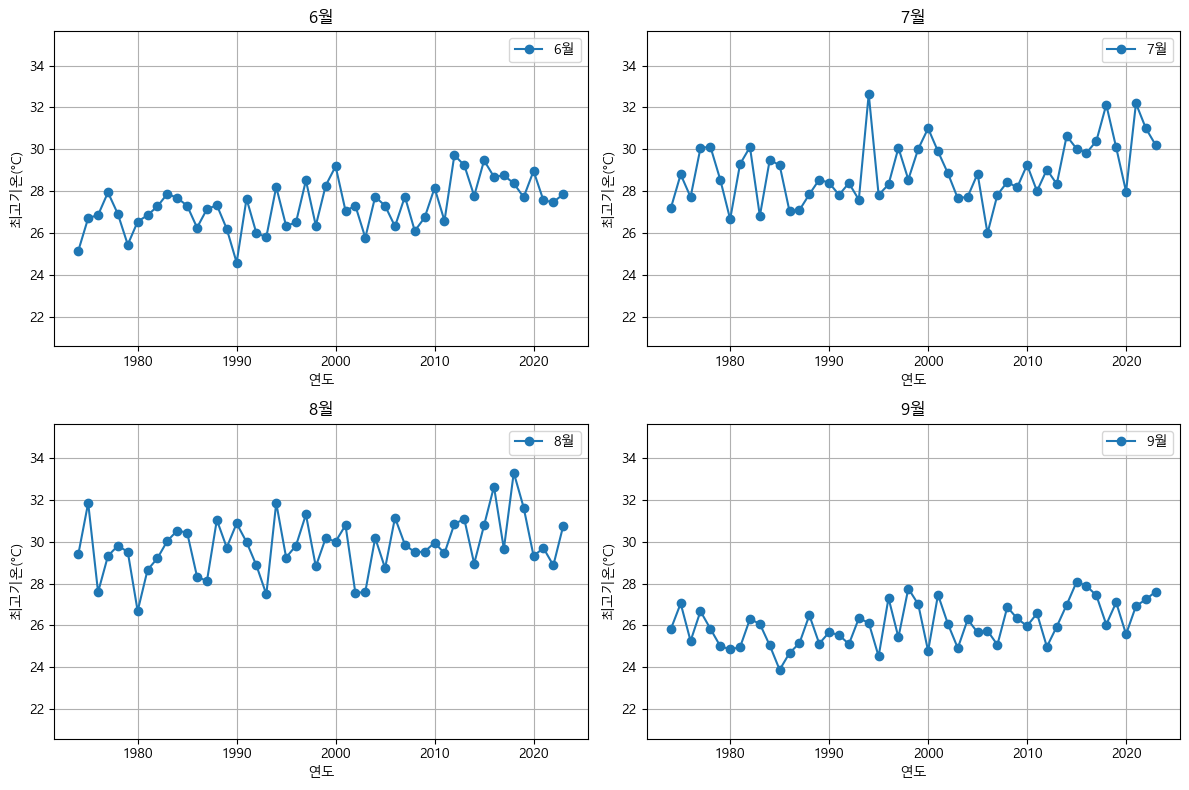

In [127]:
# subplot에 그릴 월별 평균기온 데이터 선택
months = [6, 7, 8, 9]

# subplot을 이용하여 그래프 그리기
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
y_max = 0
y_min = float('inf')
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    month_data = result_df[result_df['월'] == month]
    axs[row, col].plot(month_data['연도'], month_data['최고기온(°C)'], marker='o', linestyle='-', label=f'{month}월')
    axs[row, col].set_title(f'{month}월')
    axs[row, col].set_xlabel('연도')
    axs[row, col].set_ylabel('최고기온(°C)')
    axs[row, col].legend()
    axs[row, col].grid(True)
    
    # 각 서브플롯의 y축 범위 업데이트
    y_max = max(y_max, month_data['최고기온(°C)'].max())+1
    y_min = min(y_min, month_data['최고기온(°C)'].min())-1

# 모든 서브플롯의 y축 범위를 동일하게 설정
for ax in axs.flat:
    ax.set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()